In [1]:
# pip install dataframe_image

In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df
from scipy.stats import linregress


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [3]:
#removing the '.' in front of the county names
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')

# removing 'Georgia' from the counties
county21 = recent_census21.str.split(',').str[0]

#print(county21)

C:\Users\yhuan\AppData\Local\Temp/ipykernel_15424/1222772202.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


In [4]:
# extracting 2020 and 2021 columns
data21 = recent_census[['2020','2021']]

#convert object to int
census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

#print(census_20)

In [5]:
#convert object to int
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

#print(census_21)

In [6]:
# create a cleaned up dataframe
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

#set index to county
census21_df= organized_21.set_index("County")

#print(census21_df)

In [7]:
#read csv file
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# extract Georgia's data from national data
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
#print(file_2_ga)

In [8]:
#extract the population data of interest
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]

#rename columns
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})

#set index to county
ga_census_20 = ga_census_estimate_population.set_index("County")

#print(ga_census_20)

In [9]:
#merge csv files 

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')

#label column names
column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

#reindex

merge_census = merge_census_raw.reindex(columns=column_names)

#print(merge_census)

In [10]:
# select 10 random counties
samples_df = merge_census.sample(10)

#export randomly selected counties table
samples_df.dfi.export('plots_tables/sample_counties.png')

samples_df['2020']

County
Atkinson County       8301
Calhoun County        5560
Stewart County        5295
Gordon County        57696
Terrell County        9153
Talbot County         5731
Randolph County       6377
Rockdale County      93614
Paulding County     169660
Wilkinson County      8844
Name: 2020, dtype: int64

In [11]:
#Transpose index and column
samples_df.T

County,Atkinson County,Calhoun County,Stewart County,Gordon County,Terrell County,Talbot County,Randolph County,Rockdale County,Paulding County,Wilkinson County
2010,8363,6697,6099,55256,9525,6883,7668,85359,142826,9528
2011,8359,6625,6065,55522,9390,6854,7570,85423,143606,9413
2012,8254,6568,6106,55691,9225,6643,7310,85453,144750,9481
2013,8263,6598,5555,55767,9167,6556,7202,86522,146775,9361
2014,8211,6513,5882,55848,9081,6535,7315,87222,148562,9283
2015,8331,6536,5969,56330,9016,6499,7153,88424,151691,9080
2016,8293,6359,6129,57015,8873,6361,7150,88995,155415,9021
2017,8257,6393,6329,57204,8698,6254,6974,89800,159642,8953
2018,8344,6340,6434,57737,8601,6281,6826,90402,164482,9005
2019,8269,6184,6649,58046,8573,6188,6806,90639,169302,8936


In [12]:
#collect statistics for 19, 20, 21
sample_19= samples_df['2019'].describe()
sample_20 = samples_df['2020'].describe()
sample_21 = samples_df['2020'].describe()

#create new df
sample_stat = pd.DataFrame({'2019': sample_19, '2020': sample_20, '2021': sample_21})

#export
sample_stat.dfi.export('plots_tables/sample_stat.png')

sample_stat


,2019,2020,2021
count,10.000000,10.00000,10.00000
mean,36959.200000,37023.10000,37023.10000
std,54748.818168,55310.42411,55310.42411
min,6184.000000,5295.00000,5295.00000
25%,6688.250000,5892.50000,5892.50000
50%,8421.000000,8572.50000,8572.50000
75%,45768.500000,45560.25000,45560.25000
max,169302.000000,169660.00000,169660.00000


In [13]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
stat_years =[]

# for loop
for each in years:

    samples_df_data = samples_df[each]
    
    stat_years.append(samples_df_data)
        
# zip into dictionary
year_zip = dict(zip(years, stat_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in year_zip:
    quartiles = year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: 6688.25
The upper quartile of 2019 is: 45768.5
The interquartile range of 2019 is: 39080.25
Values below -51932.125 could be 2019 outliers.
Values above 104388.875 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 5892.5
The upper quartile of 2020 is: 45560.25
The interquartile range of 2020 is: 39667.75
Values below -53609.125 could be 2020 outliers.
Values above 105061.875 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: 5878.25
The upper quartile of 2021 is: 45918.75
The interquartile range of 2021 is: 40040.5
Values below -54182.5 could be 2021 outliers.
Values above 105979.5 could be 2021 outliers.
--------------------


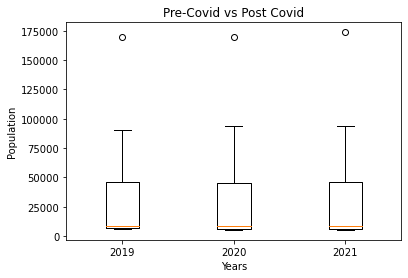

In [14]:
plt.boxplot(stat_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("Population")
plt.title("Pre-Covid vs Post Covid")
plt.savefig('plots_tables/precovidpostcovid.png')
plt.show()

In [15]:
# year to year percent change
samp_change = samples_df.pct_change(axis= 'columns', periods =1)

#dropping 2010 
clean_samp_change = samp_change.drop(columns= ['2010'])
# multiply by 100 for percent
per_samp_change= clean_samp_change*100

#export percent change table
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Atkinson County,-0.047830,-1.256131,0.109038,-0.629311,1.461454,-0.456128,-0.434101,1.053651,-0.898849,0.386988,1.084207
Calhoun County,-1.075108,-0.860377,0.456760,-1.288269,0.353140,-2.708078,0.534675,-0.829032,-2.460568,-10.090556,-0.917266
Stewart County,-0.557468,0.676010,-9.023911,5.886589,1.479089,2.680516,3.263175,1.659030,3.341623,-20.363965,0.868744
Gordon County,0.481396,0.304384,0.136467,0.145247,0.863057,1.216048,0.331492,0.931753,0.535185,-0.602970,0.937673
Terrell County,-1.417323,-1.757188,-0.628726,-0.938148,-0.715780,-1.586069,-1.972275,-1.115199,-0.325544,6.765426,-2.064897
Talbot County,-0.421328,-3.078494,-1.309649,-0.320317,-0.550880,-2.123404,-1.682125,0.431724,-1.480656,-7.385262,0.191939
Randolph County,-1.278039,-3.434610,-1.477428,1.569009,-2.214627,-0.041940,-2.461538,-2.122168,-0.292997,-6.303262,-1.411322
Rockdale County,0.074977,0.035119,1.250980,0.809043,1.378093,0.645752,0.904545,0.670379,0.262162,3.282252,0.499925
Paulding County,0.546119,0.796624,1.398964,1.217510,2.106191,2.454991,2.719815,3.031784,2.930412,0.211456,2.428386


In [16]:
#collect statistics for 19, 20, 21
per_samp_19= per_samp_change['2019'].describe()
per_samp_20= per_samp_change['2020'].describe()
per_samp_21= per_samp_change['2021'].describe()

#create new df
per_samp_stat = pd.DataFrame({'2019': per_samp_19, '2020': per_samp_20, '2021': per_samp_19})

per_samp_stat


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,0.084453,-3.512944,0.084453
std,1.821818,7.785585,1.821818
min,-2.460568,-20.363965,-2.460568
25%,-0.865697,-7.114762,-0.865697
50%,-0.309270,-0.816257,-0.309270
75%,0.466930,0.343105,0.466930
max,3.341623,6.765426,3.341623


In [17]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
per_stat_years =[]

# for loop
for each in years:

    per_samples_df_data = per_samp_change[each]
    
    per_stat_years.append(per_samples_df_data)
        
# zip into dictionary
per_year_zip = dict(zip(years, per_stat_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in year_zip:
    quartiles = per_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: -0.8656973488149505
The upper quartile of 2019 is: 0.4669296426622338
The interquartile range of 2019 is: 1.3326269914771842
Values below -2.864637836030727 could be 2019 outliers.
Values above 2.4658701298780104 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: -7.114761804719624
The upper quartile of 2020 is: 0.34310477052958976
The interquartile range of 2020 is: 7.457866575249214
Values below -18.301561667593447 could be 2020 outliers.
Values above 11.529904633403412 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: -0.7246977180806219
The upper quartile of 2021 is: 0.9204410162319931
The interquartile range of 2021 is: 1.645138734312615
Values below -3.192405819549544 could be 2021 outliers.
Values above 3.388149117700915 could be 2021 outliers.
--------------------


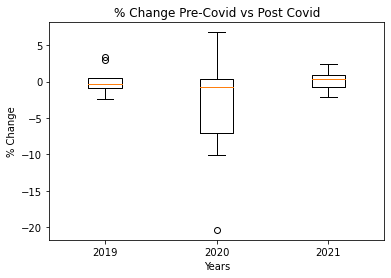

In [18]:
plt.boxplot(per_stat_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("% Change")
plt.title("% Change Pre-Covid vs Post Covid")
plt.savefig('plots_tables/per_precovidpostcovid.png')
plt.show()

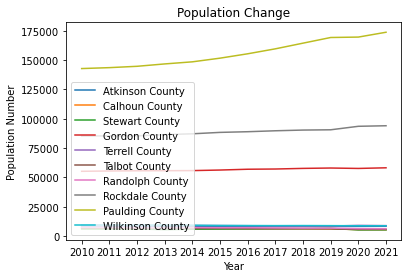

In [19]:
# plot sampled counties 
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

#save figure 
plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

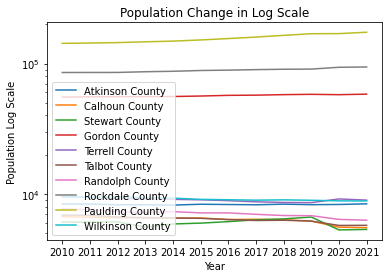

In [20]:
#plot sampled counties in log scale
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")

#set log scale
plt.yscale('log')

#save figure
plt.savefig('plots_tables/sample_counties_plot_logscale.png')

plt.show()


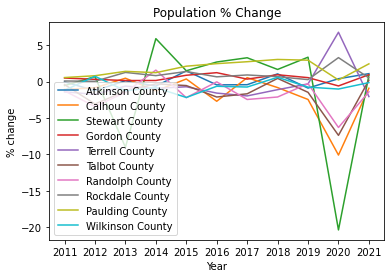

In [21]:
#plot percent change
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")

#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()

The 10 counties are randomized when the kernal is restarted, but the counties that were selected are hard coded. These following counties are hard coded in reference to the initial merged dataframe.

In [22]:
#rename df
sample_counties = merge_census

#percent change
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

#drop 2010 
samp_change = samp_change.drop(columns=['2010'])
#multiply by 100 for percent
per_samp_change= samp_change*100

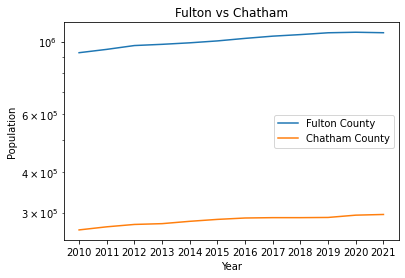

In [23]:
#compare the population change between Fulton and Chatham 
plt.plot(sample_counties.T['Fulton County'], label='Fulton County' );
plt.plot(sample_counties.T['Chatham County'], label='Chatham County' );
plt.legend(loc="best")
plt.yscale('log')

#labeling 
plt.title("Fulton vs Chatham")
plt.xlabel("Year")
plt.ylabel("Population")

#save figure
plt.savefig('plots_tables/fulton_chatham_plot.png')
plt.show()

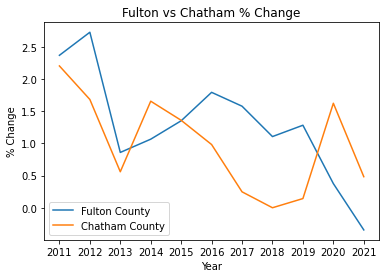

In [24]:
#compare % change between Fulton and Chatham
plt.plot(per_samp_change.T['Fulton County'], label='Fulton County');
plt.plot(per_samp_change.T['Chatham County'], label='Chatham County');
plt.legend(loc="lower left")

#labeling 
plt.title("Fulton vs Chatham % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/fulton_chatham_change_plot.png')
plt.show()

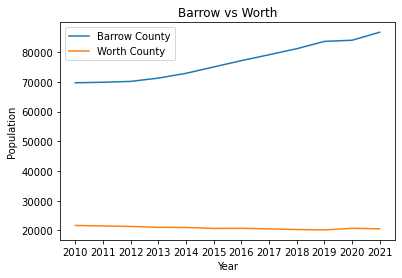

In [25]:
#compare population change between Barrow and County 
plt.plot(sample_counties.T['Barrow County'], label='Barrow County' );
plt.plot(sample_counties.T['Worth County'], label='Worth County' );
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/barrow_worth_plot.png')
plt.show()

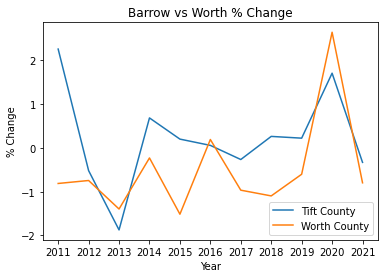

In [26]:
#compare % change between Barrow and Worth
plt.plot(per_samp_change.T['Tift County'], label='Tift County');
plt.plot(per_samp_change.T['Worth County'], label='Worth County');
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/barrow_worth_change_plot.png')
plt.show()

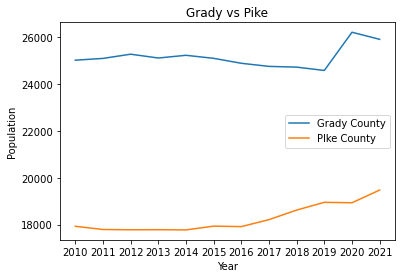

In [27]:
#compare the population change between Grady and Pike 
plt.plot(sample_counties.T['Grady County'], label='Grady County' );
plt.plot(sample_counties.T['Pike County'], label='PIke County' );
plt.legend(loc="best")

#labeling 
plt.title("Grady vs Pike")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/grady_pike_plot.png')
plt.show()

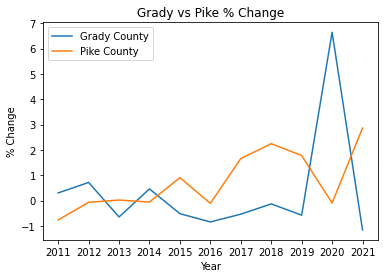

In [28]:
#compare % change between Grady and Pike
plt.plot(per_samp_change.T['Grady County'], label='Grady County');
plt.plot(per_samp_change.T['Pike County'], label='Pike County');
plt.legend(loc="best")
#labeling 
plt.title("Grady vs Pike % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/grady_pike_change_plot.png')
plt.show()

In [29]:
# setting the x and y axis 
fulton_years = sample_counties.T['Fulton County'].index.astype(float)
fulton_pop = sample_counties.T['Fulton County']

The r-squared is: 0.9674131773839155


<function matplotlib.pyplot.show(close=None, block=None)>

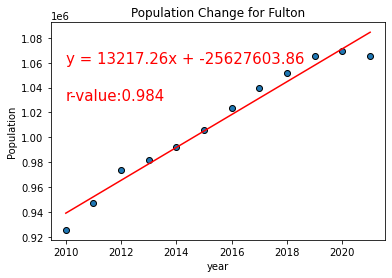

In [30]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_years,fulton_pop)
regress_values = fulton_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_years, fulton_pop, edgecolor = "black")

# draw our regression line
plt.plot(fulton_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,1060000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,1030000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Fulton")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/fulton_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [31]:
# setting the x and y axis 
fulton_per = per_samp_change.T['Fulton County']
fulton_per_year = per_samp_change.T['Fulton County'].index.astype(float)

The r-squared is: 0.5665640906797728


<function matplotlib.pyplot.show(close=None, block=None)>

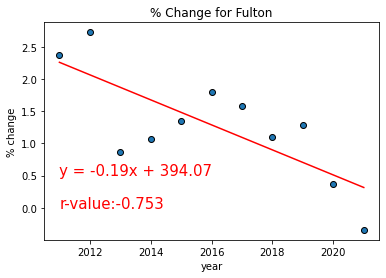

In [32]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_per_year,fulton_per)
regress_values = fulton_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_per_year, fulton_per, edgecolor = "black")

# draw our regression line
plt.plot(fulton_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Fulton")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/fulton_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [33]:
# setting the x and y axis 
chatham_years = sample_counties.T['Chatham County'].index.astype(float)
chatham_pop = sample_counties.T['Chatham County']

The r-squared is: 0.9337720205022068


<function matplotlib.pyplot.show(close=None, block=None)>

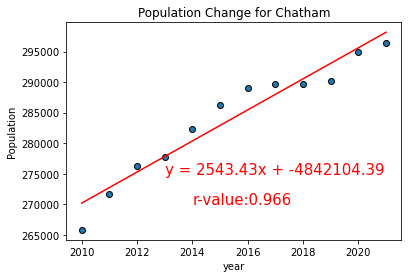

In [34]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_years,chatham_pop)
regress_values = chatham_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_years, chatham_pop, edgecolor = "black")

# draw our regression line
plt.plot(chatham_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2013,275000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,270000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Chatham")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/chatham_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [35]:
# setting the x and y axis 
chatham_per = per_samp_change.T['Chatham County']
chatham_per_year = per_samp_change.T['Chatham County'].index.astype(float)

The r-squared is: 0.3403660066509065


<function matplotlib.pyplot.show(close=None, block=None)>

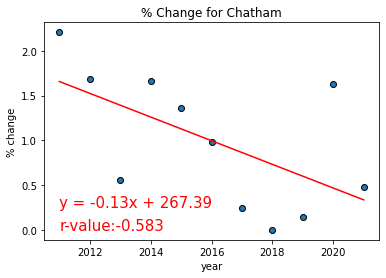

In [36]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_per_year,chatham_per)
regress_values = chatham_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_per_year, chatham_per, edgecolor = "black")

# draw our regression line
plt.plot(chatham_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Chatham")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/chatham_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [37]:
# setting the x and y axis 
grady_years = sample_counties.T['Grady County'].index.astype(float)
grady_pop = sample_counties.T['Grady County']

The r-squared is: 0.09159820413588947


<function matplotlib.pyplot.show(close=None, block=None)>

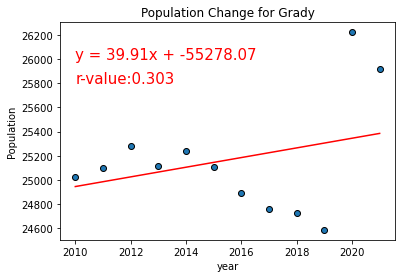

In [38]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_years,grady_pop)
regress_values = grady_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_years, grady_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,26000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,25800), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Grady")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/grady_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [39]:
# setting the x and y axis 
grady_per = per_samp_change.T['Grady County']
grady_per_year = per_samp_change.T['Grady County'].index.astype(float)

The r-squared is: 0.04592530592906027


<function matplotlib.pyplot.show(close=None, block=None)>

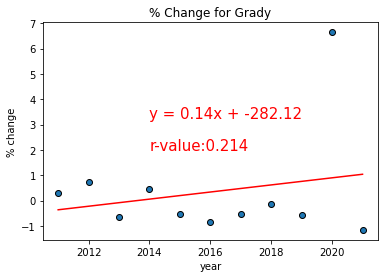

In [40]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_per_year,grady_per)
regress_values = grady_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_per_year, grady_per, edgecolor = "black")

# draw our regression line
plt.plot(grady_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,3.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,2), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Grady")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/grady_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [41]:
# setting the x and y axis 
worth_years = sample_counties.T['Worth County'].index.astype(float)
worth_pop = sample_counties.T['Worth County']

The r-squared is: 0.7764997093787491


<function matplotlib.pyplot.show(close=None, block=None)>

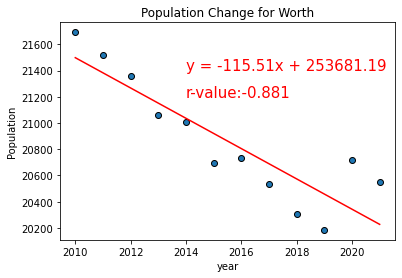

In [42]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_years,worth_pop)
regress_values = worth_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_years, worth_pop, edgecolor = "black")

# draw our regression line
plt.plot(worth_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,21400),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,21200), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Worth")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/worth_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [43]:
# setting the x and y axis 
worth_per = per_samp_change.T['Worth County']
worth_per_year = per_samp_change.T['Worth County'].index.astype(float)

The r-squared is: 0.15259008460634854


<function matplotlib.pyplot.show(close=None, block=None)>

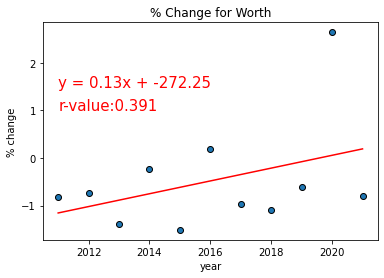

In [44]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_per_year,worth_per)
regress_values = worth_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_per_year, worth_per, edgecolor = "black")

# draw our regression line
plt.plot(worth_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,1.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,1), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Worth")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/worth_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show